<a href="https://colab.research.google.com/github/octaviocostt/Python/blob/main/transferLearningipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import os

import random
import tensorflow as tf
import zipfile

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from shutil import copyfile

In [18]:

def remove_files (SOURCE):
  print('DELETANDO OS ARQUIVOS EM '+SOURCE)
  if os.path.exists(SOURCE):
    if len(os.listdir(SOURCE)) > 0:
      for filename in os.listdir(SOURCE):
        file = SOURCE +'/'+ filename
        os.remove(file)
      else:
        print('Não existem arquivos no diretório: '+SOURCE)
    os.rmdir(SOURCE)
  else:
    print('Diretório :'+SOURCE+' não existe')

remove_files('/tmp/cats-v-dogs/testing/cats')
remove_files('/tmp/cats-v-dogs/testing/dogs')
remove_files('/tmp/cats-v-dogs/training/cats')
remove_files('/tmp/cats-v-dogs/training/dogs')
remove_files('/tmp/cats-v-dogs/training')
remove_files('/tmp/cats-v-dogs/testing')
remove_files('/tmp/cats-v-dogs')

remove_files('/tmp/PetImages/Cat')
remove_files('/tmp/PetImages/Dog')
remove_files('/tmp/PetImages')

try:
  os.mkdir('/tmp/cats-v-dogs')
  os.mkdir('/tmp/cats-v-dogs/training')
  os.mkdir('/tmp/cats-v-dogs/testing')
  os.mkdir('/tmp/cats-v-dogs/training/cats')
  os.mkdir('/tmp/cats-v-dogs/training/dogs')
  os.mkdir('/tmp/cats-v-dogs/testing/cats')
  os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
  pass

DELETANDO OS ARQUIVOS EM /tmp/cats-v-dogs/testing/cats
DELETANDO OS ARQUIVOS EM /tmp/cats-v-dogs/testing/dogs
DELETANDO OS ARQUIVOS EM /tmp/cats-v-dogs/training/cats
DELETANDO OS ARQUIVOS EM /tmp/cats-v-dogs/training/dogs
DELETANDO OS ARQUIVOS EM /tmp/cats-v-dogs/training
DELETANDO OS ARQUIVOS EM /tmp/cats-v-dogs/testing
DELETANDO OS ARQUIVOS EM /tmp/cats-v-dogs
DELETANDO OS ARQUIVOS EM /tmp/PetImages/Cat
Diretório :/tmp/PetImages/Cat não existe
DELETANDO OS ARQUIVOS EM /tmp/PetImages/Dog
Diretório :/tmp/PetImages/Dog não existe
DELETANDO OS ARQUIVOS EM /tmp/PetImages
Diretório :/tmp/PetImages não existe


In [19]:
!echo "download do arquivo zip de base de fotos"

!curl -L -o /tmp/cats-and-dogs.zip --progress-bar https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

download do arquivo zip de base de fotos
############################################################################################# 100.0%


In [20]:
print(len(os.listdir('/tmp/PetImages/Cat')))
print(len(os.listdir('/tmp/PetImages/Dog')))

12501
12501


In [21]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  files = []
  for filename in os.listdir(SOURCE):
    file = SOURCE + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename + "Arquivo Ignorado, tamanho zero")

  training_length = int(len(files) * SPLIT_SIZE)
  testing_length = int(len(files) - training_length)
  shuffled_set = random.sample(files, len(files))
  training_set = shuffled_set[0:training_length]
  testing_set = shuffled_set[-testing_length:]


  for filename in training_set:
    this_file = SOURCE + filename
    destination = TRAINING + filename
    copyfile(this_file, destination)

  for filename2 in testing_set:
    this_file = SOURCE + filename2
    destination = TESTING + filename2
    copyfile(this_file, destination)


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data (CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data (DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)


666.jpgArquivo Ignorado, tamanho zero
11702.jpgArquivo Ignorado, tamanho zero


In [22]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs')))

11250
11250
1250
1250


In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])

In [24]:

TRAINING_DIR = '/tmp/cats-v-dogs/training/'
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=250,
                                                    class_mode='binary',
                                                    target_size=(150,150))

VALIDATION_DIR = '/tmp/cats-v-dogs/testing/'
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = train_datagen.flow_from_directory(VALIDATION_DIR,
                                                    batch_size=250,
                                                    class_mode='binary',
                                                    target_size=(150,150))



Found 22499 images belonging to 2 classes.
Found 2499 images belonging to 2 classes.


In [26]:
history = model.fit(train_generator, epochs=10, steps_per_epoch=10,
                    validation_data=validation_generator, validation_steps=6)


Epoch 1/10
10/10 [==============================] - 74s 7s/step - loss: 0.5233 - binary_accuracy: 0.7372 - false_negatives: 341.0000 - val_loss: 0.5633 - val_binary_accuracy: 0.7213 - val_false_negatives: 266.0000
Epoch 2/10
10/10 [==============================] - 75s 8s/step - loss: 0.5038 - binary_accuracy: 0.7608 - false_negatives: 340.0000 - val_loss: 0.5075 - val_binary_accuracy: 0.7500 - val_false_negatives: 208.0000
Epoch 3/10
10/10 [==============================] - 74s 8s/step - loss: 0.5297 - binary_accuracy: 0.7316 - false_negatives: 336.0000 - val_loss: 0.5351 - val_binary_accuracy: 0.7307 - val_false_negatives: 311.0000
Epoch 4/10
10/10 [==============================] - 75s 8s/step - loss: 0.4764 - binary_accuracy: 0.7740 - false_negatives: 306.0000 - val_loss: 0.5234 - val_binary_accuracy: 0.7387 - val_false_negatives: 145.0000
Epoch 5/10
10/10 [==============================] - 73s 7s/step - loss: 0.4684 - binary_accuracy: 0.7768 - false_negatives: 294.0000 - val_loss:

In [27]:
print(history.history)

{'loss': [0.5233362317085266, 0.5037611722946167, 0.5296919941902161, 0.4764249622821808, 0.4684455990791321, 0.4664722681045532, 0.4587344229221344, 0.46589183807373047, 0.4524202048778534, 0.4498676359653473], 'binary_accuracy': [0.7372000217437744, 0.7608000040054321, 0.7315999865531921, 0.7739999890327454, 0.7767999768257141, 0.7663999795913696, 0.7860000133514404, 0.7720000147819519, 0.7832000255584717, 0.7851999998092651], 'false_negatives': [341.0, 340.0, 336.0, 306.0, 294.0, 288.0, 314.0, 313.0, 296.0, 280.0], 'val_loss': [0.5633218884468079, 0.5075300335884094, 0.5351200699806213, 0.5234342217445374, 0.5067415237426758, 0.5266686081886292, 0.5136105418205261, 0.5204023718833923, 0.48140010237693787, 0.49419140815734863], 'val_binary_accuracy': [0.7213333249092102, 0.75, 0.7306666374206543, 0.7386666536331177, 0.7693333625793457, 0.7519999742507935, 0.7480000257492065, 0.7506666779518127, 0.7753333449363708, 0.768666684627533], 'val_false_negatives': [266.0, 208.0, 311.0, 145.0

<Figure size 640x480 with 0 Axes>

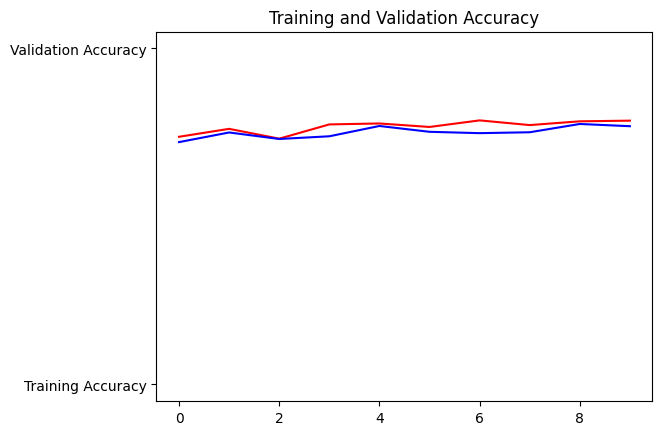

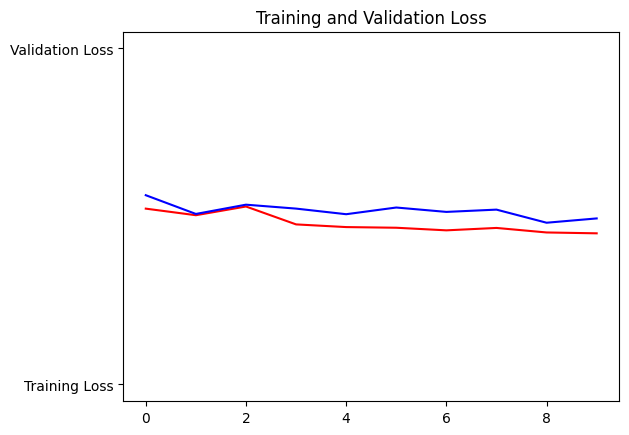

<Figure size 640x480 with 0 Axes>

In [28]:
%matplotlib inline

acc = history.history['binary_accuracy']
val_acc=history.history['val_binary_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.figure()


plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and Validation Loss')
plt.figure()